<a href="https://colab.research.google.com/github/gulsumaltintas/MachineLearning/blob/main/LineerRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #Kendi
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

HeadBrain Veri Set

In [ ]:
df = pd.read_csv('/gdrive/My Drive/headbrain.csv', sep=';') #Basit Lineer regresyon için kullanılan veri seti


In [ ]:
df

,Gender,Age Range,Head_Size,Brain_Weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [ ]:
df.info() #Veri setinin içeriğini görebilmek için info() fonksiyonu kullanılır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        237 non-null    int64
 1   Age Range     237 non-null    int64
 2   Head_Size     237 non-null    int64
 3   Brain_Weight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


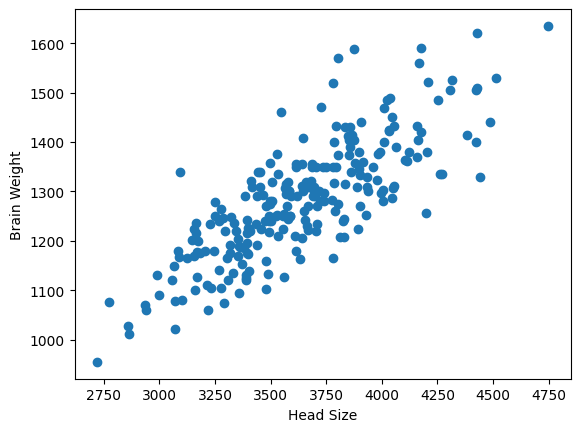

In [ ]:
plt.scatter(df.Head_Size,df.Brain_Weight) #scatter() fonksiyonu ile görselleştirme
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

WeatherHistory Veri Seti

In [ ]:
df2 = pd.read_csv('/gdrive/My Drive/weatherHistory.csv', sep=',') #Çoklu lineer regresyon için kullanılan veri seti

In [ ]:
df2

,Formatted_Date,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Formatted_Date        96453 non-null  object 
 1   Summary               96453 non-null  object 
 2   Precip_Type           95936 non-null  object 
 3   Temperature           96453 non-null  float64
 4   Apparent_Temperature  96453 non-null  float64
 5   Humidity              96453 non-null  float64
 6   Wind_Speed            96453 non-null  float64
 7   Wind_Bearing          96453 non-null  float64
 8   Visibility            96453 non-null  float64
 9   Loud_Cover            96453 non-null  float64
 10  Pressure              96453 non-null  float64
 11  Daily_Summary         96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# **Linear Regression**


In [ ]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression() # Değişken oluşturma

In [ ]:
x = df.Head_Size.values.reshape(-1,1) # x ekseni değerlerini kullanacağız.(-1,1) değerleri boyutlarını belirlemek için.
y = df.Brain_Weight.values.reshape(-1,1) # y ekseni değerlerini kullanacağız

In [ ]:
x.shape # kaç tane veri olduğunu bulmak için

(237, 1)

In [ ]:
y.shape

(237, 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# random_state=0 verimi her zaman aynı şekillerde göndermesini istediğim için kullanıyorum.
# giriş verisi x, çıkış verisi y
# x_train head_size karşılık gelen x değeri
# y_train brain_weight karşılık gelen y değeri
# x_test test edecek olduğumuz head_size karşılık gelen x değerleri
# y_test test edecek olduğumuz brain_weight karşılık gelen y değerleri

In [ ]:
model_regression.fit(x_train, y_train)
# Modelimizi fit ediyoruz.Modelimizdeki en optimal çizgiyi çeker.

LinearRegression()

In [ ]:
y_pred = model_regression.predict(x_test) #Tahmin ettiğimiz değerler.

In [ ]:
y_pred

array([[1306.48231242],
       [1294.99527544],
       [1386.89157129],
       [1254.26850796],
       [1321.62431571],
       [1286.3799977 ],
       [1505.93904546],
       [1256.61812916],
       [1387.41370934],
       [1339.63807825],
       [1408.29923112],
       [1134.95996476],
       [1200.48828936],
       [1335.19990487],
       [1219.54632799],
       [1232.07764106],
       [1282.46396237],
       [1356.6075647 ],
       [1242.52040195],
       [1277.50365094],
       [1237.03795249],
       [1420.30840615],
       [1354.2579435 ],
       [1270.19371832],
       [1327.3678342 ],
       [1312.74796896],
       [1162.11114308],
       [1284.55251455],
       [1490.79704217],
       [1080.13547008],
       [1187.43483825],
       [1271.23799441],
       [1242.52040195],
       [1379.84270769],
       [1342.77090652],
       [1225.28984648],
       [1327.10676518],
       [1377.23201747],
       [1332.58921465],
       [1245.3921612 ],
       [1341.46556141],
       [1142.269

In [ ]:
y_test

array([[1280],
       [1321],
       [1425],
       [1250],
       [1350],
       [1408],
       [1440],
       [1210],
       [1422],
       [1405],
       [1362],
       [1150],
       [1175],
       [1430],
       [1120],
       [1192],
       [1163],
       [1360],
       [1160],
       [1355],
       [1225],
       [1370],
       [1440],
       [1300],
       [1275],
       [1350],
       [1127],
       [1355],
       [1620],
       [1027],
       [1142],
       [1250],
       [1103],
       [1280],
       [1340],
       [1322],
       [1374],
       [1296],
       [1240],
       [1132],
       [1390],
       [1340],
       [1168],
       [1405],
       [1485],
       [1255],
       [1140],
       [1202]])

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

print("MSE: ", mean_squared_error(y_test, y_pred)) #y_test test ettiğimiz gerçek y değerleri,y_pred ise tahmin edilen y değerleri.
#Modelin iyi bir performans gösterebilmesi için 0 a olabildiğince yakın olması gerekir.
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred)*100)
# MAPE yüzdelik sonuç verdiğinden 100 ile çarpılır.%10un altındaysa yüksek doğruluk oranına sahiptir.%10-%20 arasında ise doğru tahmin, iyi bir tahmin yapılmış demektir, %20-%50 arasında ise kabul edilebilir bir değer olduğu gösterilir.%50 nin üstündeyse regresyon modelimizin yanlış olduğu ortaya çıkar.

MSE:  5200.615465989548
MAPE:  4.66035761499791


In [ ]:
print("COEF (Eğim): ", model_regression.coef_)
print("Intercept ( Y eksenini kestiği nokta): ", model_regression.intercept_)

COEF (Eğim):  [[0.26106902]]
Intercept ( Y eksenini kestiği nokta):  [334.26127335]


#**Multiple Linear Regression**

In [ ]:
x = df[['Humidity','Wind_Speed','Pressure','Wind_Bearing']]
y = df['Temperature']

KeyError: ignored

In [ ]:
multiple_regression  = LinearRegression()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
multiple_regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
from ast import Mult
y_pred = multiple_regression.predict(x_test)

In [ ]:
print("COEF: ", multiple_regression.coef_)
print("Intercept (y eksenini kestiği nokta): ", multiple_regression.intercept_)

COEF:  [-3.25690116e+01 -2.02470954e-01 -7.07132918e-04  4.10202244e-03]
Intercept (y eksenini kestiği nokta):  37.995443323077254


In [ ]:
pred_df = pd.DataFrame({"Gerçek Değer":y_test,
                        "Tahmin Edilen Değer": y_pred,
                        "Residual":y_test-y_pred})

In [ ]:
pred_df

,Gerçek Değer,Tahmin Edilen Değer,Residual
6119,14.422222,7.389292,7.032930
51443,12.155556,11.920004,0.235551
18754,23.961111,15.909784,8.051327
34070,15.000000,7.597085,7.402915
26082,12.800000,11.276078,1.523922
...,...,...,...
12953,28.888889,23.552648,5.336241
78272,17.216667,6.069665,11.147002
1985,-1.000000,7.780993,-8.780993
82141,7.327778,6.312147,1.015631


In [ ]:
print("MSE: ",mean_squared_error(y_test, y_pred ))
print("MAPE: ",mean_absolute_percentage_error(y_test, y_pred)*100)

MSE:  53.132244900132214
MAPE:  1.3462032129746654e+16


In [ ]:
#plt.scatter(x_train, y_train, color='red')
#plt.plot(x_train, multiple_regression.predict(x_train),color='blue')
#plt.xlabel("Tüm Değerler")
#plt.ylabel("Sıcaklık")
#plt.show()

#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)

<ipython-input-34-514823024f98>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


RandomForestRegressor()

In [ ]:
rf_pred = random_forest.predict(x_test)

In [ ]:
print("MSE: ", mean_squared_error(y_test,rf_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test,rf_pred)*100)

MSE:  8632.289596350696
MAPE:  5.911772281266718


#**Label Encoding**

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame()
df['otomobil_markasi'] = ['Mercedes-Benz','Audi','Toyota','Renault','Ford']
df

,otomobil_markasi
0,Mercedes-Benz
1,Audi
2,Toyota
3,Renault
4,Ford


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label = label_encoder.fit_transform(df['otomobil_markasi'])
label


array([2, 0, 4, 3, 1])

In [ ]:
df_label = pd.DataFrame(label, columns = ['otomobil_markasi'])
df_label

,otomobil_markasi
0,2
1,0
2,4
3,3
4,1


In [ ]:
pd.concat([df, df_label], axis=1)

,otomobil_markasi,otomobil_markasi
0,Mercedes-Benz,2
1,Audi,0
2,Toyota,4
3,Renault,3
4,Ford,1


#**OneHotEncoding**

In [ ]:
df = pd.DataFrame({'otomobil_markasi':['Mercedes-Benz','Audi','Toyota','Renault','Ford'],
                   'kategorik_degeri': [0,1,2,3,4],
                   'fiyat': [5000000,400000,200000000,3500000,1750000]})
df

,otomobil_markasi,kategorik_degeri,fiyat
0,Mercedes-Benz,0,5000000
1,Audi,1,400000
2,Toyota,2,200000000
3,Renault,3,3500000
4,Ford,4,1750000


In [ ]:
df_dummy = pd.get_dummies(df, columns=['otomobil_markasi']) #mevcut olan değere 1 mevcut olmayana 0
df_dummy

,kategorik_degeri,fiyat,otomobil_markasi_Audi,otomobil_markasi_Ford,otomobil_markasi_Mercedes-Benz,otomobil_markasi_Renault,otomobil_markasi_Toyota
0,0,5000000,0,0,1,0,0
1,1,400000,1,0,0,0,0
2,2,200000000,0,0,0,0,1
3,3,3500000,0,0,0,1,0
4,4,1750000,0,1,0,0,0
